In [5]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [16]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 正規化圖像數據增加一個維度通道
train_images = train_images.reshape(-1, 28, 28, 1) / 255.0
test_images = test_images.reshape(-1, 28, 28, 1) / 255.0

In [7]:
model = Sequential([
    # 第一層卷積，32個神經元，filter 3* 3
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), 
    # 最大池化層
    MaxPooling2D((2, 2)), 
    Conv2D(64, (3, 3), activation='relu'), 
    MaxPooling2D((2, 2)), 
    Flatten(), 
    Dense(64, activation='relu'), 
    Dense(10, activation='softmax') 
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0138 - accuracy: 0.9954
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0109 - accuracy: 0.9963
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0086 - accuracy: 0.9969
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0083 - accuracy: 0.9975
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0070 - accuracy: 0.9979


In [11]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0262 - accuracy: 0.9925
Test accuracy: 0.9925


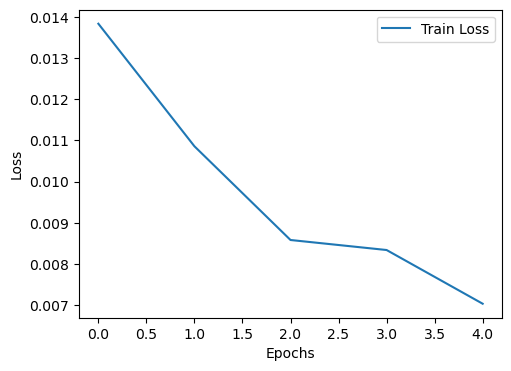

In [18]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [12]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [14]:
predictions[0]

array([4.2077986e-09, 1.1766337e-08, 6.5036211e-08, 6.4920613e-07,
       4.5147043e-13, 8.5419206e-12, 3.9793571e-18, 9.9999917e-01,
       3.3729986e-08, 1.4005472e-07], dtype=float32)

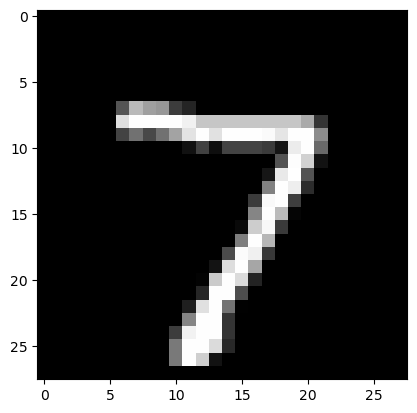

In [15]:
plt.imshow(test_images[0], cmap='gray')
plt.show()